# Analyse the simulations of the ns3d.strat solver

Control parameters:
* Froude number:
  \begin{equation}
  F_h = \frac{\epsilon}{N U^2}
  \end{equation}
* Reynolds number:
  \begin{equation}
  Re = \frac{U L_h}{\nu}
  \end{equation}
* Buoyancy Reynolds number
  \begin{equation}
  \mathcal{R} = Re F_h^2 = \frac{\epsilon}{\nu N^2}
  \end{equation}
* When hyperviscosity of order $n$ is used, we can define hyperviscous Reynolds numbers as:
  \begin{equation}
  Re_n = \frac{U L_h^{n-1}}{\nu_n}, ~~~~ \text{and} ~~~~ \mathcal{R}_n = Re_n F_h^n = \frac{\varepsilon}{U^{n-2}}{\nu_n N^n}
  \end{equation}
* Projection:
  `None` or `"poloidal"`


## Select the parameters of the simulation:

In [1]:
Fh=1./40.  # Froude number
Rb=20  # Buoyancy Reynolds number
proj="poloidal"  # Projection

## Check the environement (optional)

In [2]:
%%bash
#echo $I_MPI_PMI_LIBRARY
#module list
#fluidsim-bench -h

## Load the simulation

In [3]:
import os
import glob
from fluidsim import load
simul_txt = f"*polo_"
if proj=="poloidal":
    simul_txt += "proj_"
simul_txt += f"Fh{Fh:.3e}_Rb{Rb:.3g}*"
#print(simul_txt)
dir_path = "/scratch/vlabarre/aniso/"
simul_path = glob.glob(dir_path + simul_txt + "*", recursive = False)
print(simul_path)
#sim = load(simul_path[-1])
sim = load("~/Sim_data/aniso/ns3d.strat_polo_proj_320x320x80_V3x3x0.75_N40_2022-01-30_23-50-56")

[]
*************************************
Program fluidsim
sim:                <class 'fluidsim_core.extend_simul.extend_simul_class.<locals>.NewSimul'>
sim.output:         <class 'fluidsim.solvers.ns3d.strat.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.strat.state.StateNS3DStrat'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>
sim.forcing:        <class 'fluidsim.solvers.ns3d.forcing.ForcingNS3D'>

solver ns3d.strat, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =      4 ; ny =      4 ; nz =      4
Lx = 3 ; Ly = 3 ; Lz = 0.75
path_run =
/home/vincentlabarre/Sim_data/aniso/ns3d.strat_polo_proj_320x320x80_V3x3x0.75_N40_2022-01-30_23-50-56
init_fields.type: constant

Initialization outputs:
sim.output.phys_fields:       <class 'fluidsim.base.

## Colormap of the buoyancy and spatial means

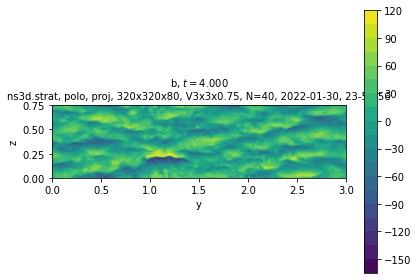

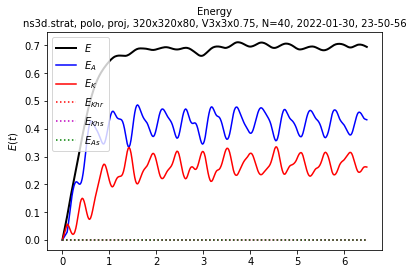

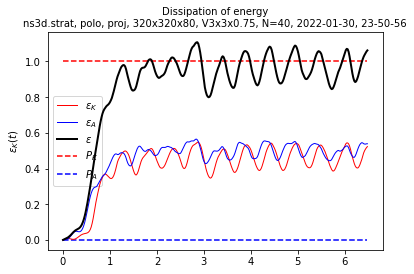

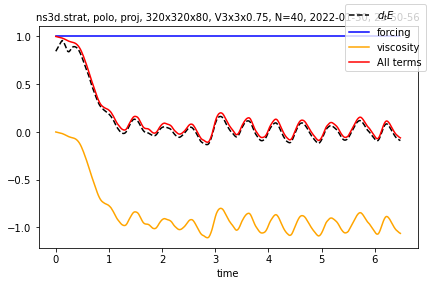

In [4]:
sim.output.phys_fields.set_equation_crosssection("x=1.5")
sim.output.phys_fields.plot(field="b", QUIVER=False, time=4)
sim.output.spatial_means.plot()
sim.output.spatial_means.plot_dt_E()

## Check the quality of the simulation

You can fix `tmin` to the time at which the simulation has reached statistically steady state in order to compute different quantities:

{'Fh': 0.056049110664056864,
 'R2': 4.62551631111111,
 'R4': 2.479586579495615,
 'epsK2/epsK': 0.2524072644444146,
 'Gamma': 1.1017504455867353,
 'dimensional': {'Uh2': 0.20844598666666664, 'epsK': 0.46255163111111114}}

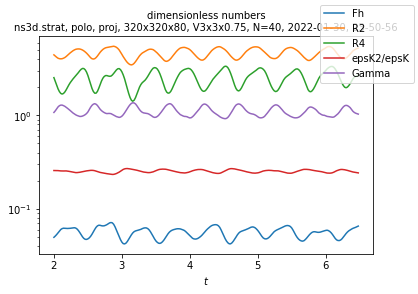

In [5]:
tmin = 2.0
sim.output.spatial_means.plot_dimless_numbers_versus_time(tmin=tmin)
sim.output.spatial_means.get_dimless_numbers_averaged(tmin=tmin)

## Plot the spectras

### 1d spatial spectras

plot1d(tmin=       2, tmax= 6.50035, coef_compensate=0.000)
plot 1D spectra
tmin =  2.00002 ; tmax =  6.50035
imin =       39 ; imax =      129


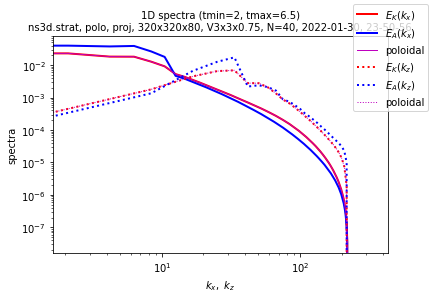

In [6]:
sim.output.spectra.plot1d(tmin=tmin)

### Spatiotemporal spectras

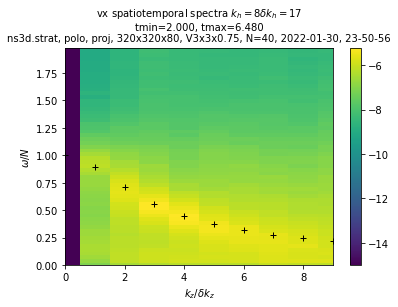

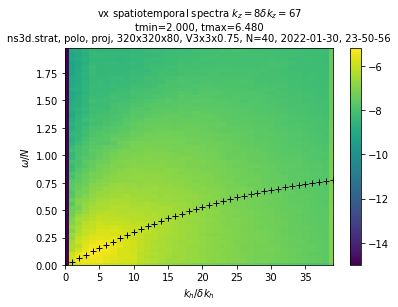

In [7]:
sim.output.spatiotemporal_spectra.plot_kzkhomega(equation="ikh=8", tmin=tmin)
sim.output.spatiotemporal_spectra.plot_kzkhomega(equation="ikz=8", tmin=tmin)

### Temporal spectra

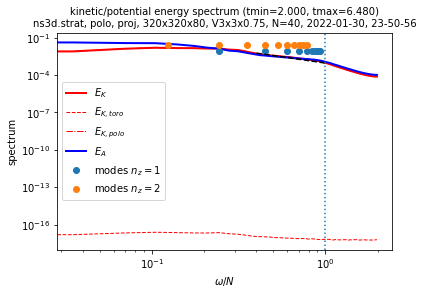

In [8]:
sim.output.spatiotemporal_spectra.plot_temporal_spectra(tmin=tmin)

## Export in html format

In [9]:
command = f"jupyter nbconvert notebook_analyze_Fh_Rb_proj.ipynb --to html --no-input --no-prompt"
#print(command)
os.system(command)
command = f"mv notebook_analyze_Fh_Rb_proj.html analyze_simulation_Fh{Fh:.3e}_Rb{Rb:.3g}_proj{proj}.html"
#print(command)
os.system(command)

[NbConvertApp] Converting notebook notebook_analyze_Fh_Rb_proj.ipynb to html
[NbConvertApp] Writing 879030 bytes to notebook_analyze_Fh_Rb_proj.html


0